Created by Martin Knudsen (martin.knudsen(at)tum.de), July 2019.

NOTE: has to be run consecutively due to some variables sharing name 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
sbn.set()

Aim is to find a funciton

$$-\phi (x)\in C^2$$

that satisfies

$$-\phi ''(x) =  \rho (x), \quad x\in (a,b)\subset R$$

for some $\rho \in C^0((a,b))$ at $x=a$ and $x=b$ and with certain boundry conditions. The domain [a,b] (for generality with boundary points) is divided into $N$ equally large cells, yielding $N+1$ grid points $x_i\in[a,b],i= 0,...,N$, on which the discrete solution is defined

1. Dirichlet boundary conditions. The values ofφare given at the boundary: $$\phi (a) =\alpha,\quad   \phi (b) =\beta$$ 

(a) __show that the problem (1)-(2) has a unique solution. (Hint: suppose φ and ψ are both solutions of (1), then formulate the Laplace equation for η:=φ−ψ, with boundary conditions):__

If we plug η into the Poisson equation it becomes the Laplace equation:

$$-\eta ''(x)=-(\phi ''(x) - \psi ''(x))=\rho(x)-\rho(x) = 0$$

we now integrate twice and get 
 $$\int\int -\eta ''(x)dxdx=-(\eta (x)+c_1 x + c_2)=0$$,
 
 where $c_1$ and $c_2$ are integration constants.Inserting the two boundary points we get (because $\eta (x)$ is zero here)
 
$$(c_1 a + c_2)=0$$
$$(c_1 b + c_2)=0$$

This implies

$$(c_1 a )=(c_1 b )$$, 

since $a \neq b$ this implies $c_1=0$ which in turn implies $c_2=0$, therefore $\eta (x)=0$ in the domain 

(b) write a finite difference solver

System matrix. N is the number of steps between a and b

In [25]:
def systemMatrix(N, a, b):
    h=(b-a)/N
    A = np.eye(N-1)*2
    for i in range(N-2):
        A[i,i+1]=-1
        A[i+1,i]=-1
    A *= 1/h**2
    #print(A)
    
    return A


direct solver

In [18]:
def solver(a, b, alfa, beta, N, rho):
    h = (b-a)/N
    A = systemMatrix(N, a, b)
    # get the x-points in the interval 
    xlist = [a+i*h for i in range(1,N)]    
    rightSide = np.array([rho(x) for x in xlist])
    # The boundry conditions are added to the right hand side. What is missing on the upper equation is:- alfa/h**2,
    # so the opposite is added to the firs b-entry. The same for the last equation with beta.  
    rightSide[0] += alfa/h**2
    rightSide[-1] += beta/h**2
    # now we can solve using the 
    x = np.linalg.solve(A,rightSide)
    
    print('This is the smallest eigval')
    print(min(abs(np.linalg.eigvals(A))))
    
    return x

(c) the plot is only at the grid points excluding the coundries

This is the smallest eigval
0.2468037076916635
This is the smallest eigval
0.2491978410112361
This is the smallest eigval
0.24979926688482967
This is the smallest eigval
0.24994980462785477
This is the smallest eigval
0.2499874504008176
This is the smallest eigval
0.24999686255247466


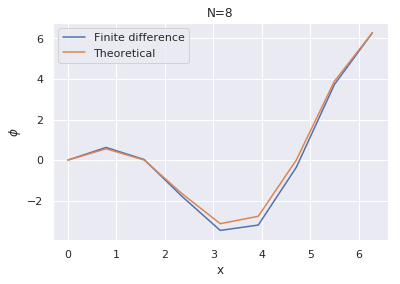

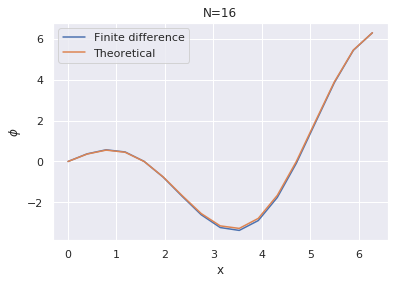

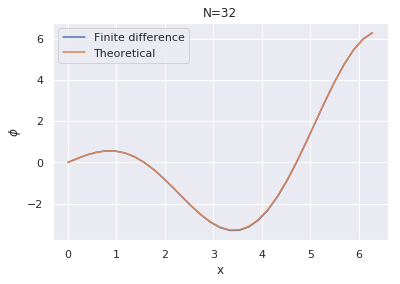

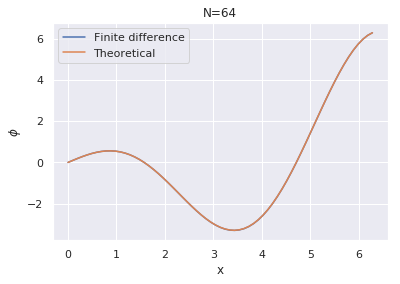

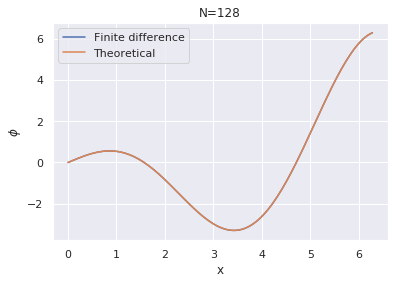

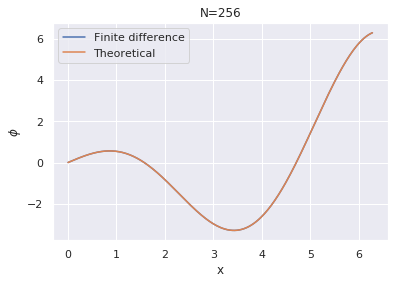

In [35]:
# constants
a = 0
b= 2*np.pi
rho = lambda x: 2*np.sin(x)+x*np.cos(x)
alfa = 0
beta= 2*np.pi
Ns = [8,16,32,64,128,256]

# theoretical answer
phiTeo = lambda x: x*np.cos(x)
# errors of the differenct cases (N x norm-type)
errors = np.zeros((6, 3))

for i, N in enumerate(Ns):
    h = (b-a)/N
    xlist = [a+i*h for i in range(0,N+1)]   
    phi = solver(a=a, b=b, alfa=alfa, beta=beta, N=N, rho=rho)
    phi = np.concatenate(([a], phi, [b]))
    # we multiply with the h so that all plots should be of the same order has h^2
    errors[i,0] = np.linalg.norm(phi*h - np.array(phiTeo(xlist))*h, ord=1)
    errors[i,1] = np.linalg.norm(phi*np.sqrt(h) - np.array(phiTeo(xlist))*np.sqrt(h), ord=2)
    errors[i,2] = np.linalg.norm(phi - np.array(phiTeo(xlist)), ord=np.inf)
    
    # plotting stuff
    plt.figure()
    plt.title('N='+str(N))
    plt.xlabel('x')
    plt.ylabel('$\phi$')
    plt.plot(xlist, phi)
    plt.plot(xlist, phiTeo(xlist))
    plt.legend(['Finite difference', 'Theoretical'])
    plt.grid(True)

(d) As one can see the solution does converge to the theoretical value as $h\rightarrow 0$. We would expect the rate of convergence to be quadratic in h, and this does seem to be the case. 

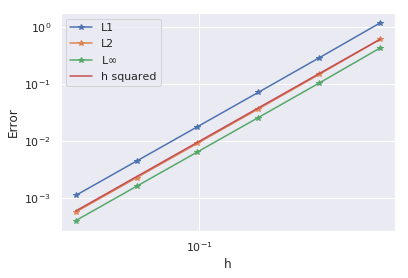

In [36]:
# deduce the h value from the N value to 3 decimal places
hs = [(b-a)/N for N in Ns]
plt.figure()
plt.loglog(hs, errors, '*-')
plt.loglog(hs, [h**2 for h in hs])
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['L1','L2','L$\infty$', 'h squared'])

2. Mixed Boundary conditions. The new boundary conditions are:
$$\phi (a)=\alpha, \quad \phi'(b)=\gamma$$
Now there are $N$ unknowns to be determined, mixed boundary conditions. 

It is not uniquely determined if we dont know the value of one of the boundries: because 

If we plug η into the Poisson equation it becomes the Laplace equation:

$$-\eta ''(x)=-(\phi ''(x) - \psi ''(x))=\rho(x)-\rho(x) = 0$$

we now integrate once and get 
 $$\int -\eta ''(x)dxdx=-(\eta '(x)+c_1 )=0$$,
 this implies $c_1 = 0$ because we know both functions have the same value at the b-point of the derivative. If we now integrate again we get
 $$\int\int -\eta ''(x)dxdx=-(\eta (x)+c_2 )=0$$,
 this holds true for all real values of $c_2$ so there is no unique solution. If on the other hand one of the boundry points is known then we plug it into the equation and find $c_2=0$. 



Basically the only thing that has changed is, there is an extra equation on the bottom of the linear system concerning the last grid point which is no longer known. the last equation is 
$$(\phi_{N+1}-\phi_{N-1})/(2h)=\gamma$$

(a) we make the new matrix by using the old matrix function and then adding a new equation to the system. The last equation is 

In [6]:
def neumannSystemMatrix(N, a, b):
    h=(b-a)/(N-1)
    A = np.eye(N-1)*2
    for i in range(N-2):
        A[i,i+1]=-1
        A[i+1,i]=-1
    A *= 1/h**2
    return A

In [7]:
def mixedSolverSymmetric(a, b, alfa, gamma, N, rho):
    h = (b-a)/N
    oldA = neumannSystemMatrix(N+1, a, b)
    # adding the new layer to the old matrix
    newA = np.zeros((N+1,N+1))
    newA[0:-1,0:-1] = oldA
    # the new equation comes at the bottom
    newA[-1,-1] = 1/(2*h)
    newA[-1,-3] = -1/(2*h)
    # the boundary point now has to be included in the calculation of the previous grid-point 
    newA[-2,-1] = -1/h**2
    # get the x-points in the interval 
    xlist = [a+i*h for i in range(1,N+1)]    
    rightSide = np.array([rho(x) for x in xlist])
    # The boundry conditions are added to the right hand side. What is missing on the upper equation is:- alfa/h**2,
    # so the opposite is added to the firs b-entry. The same for the last equation with beta.  
    rightSide[0] += alfa/h**2
    # now adding the boundary value explicitly
    rightSide = np.append(rightSide, [gamma])
    # now we can solve using the 
    x = np.linalg.solve(newA,rightSide)
    print('This is the smallest eigval')
    print(min(abs(np.linalg.eigvals(newA))))
    return x

This is the smallest eigval
0.0462881298061314
This is the smallest eigval
0.046490650582778216
This is the smallest eigval
0.04659820867759658
This is the smallest eigval
0.046653415082012296
This is the smallest eigval
0.046681357597460685
This is the smallest eigval
0.04669541153923389


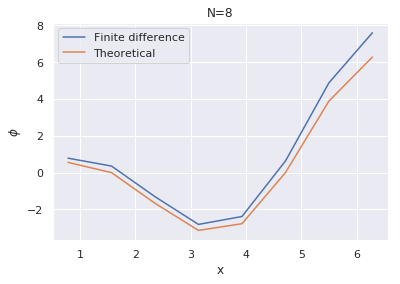

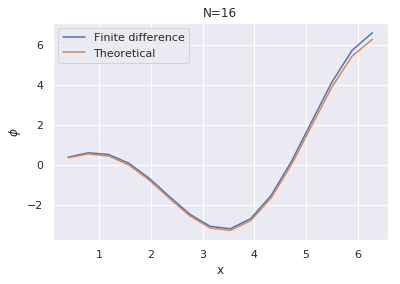

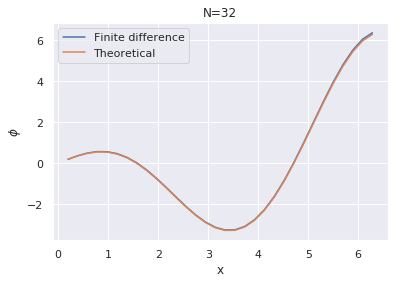

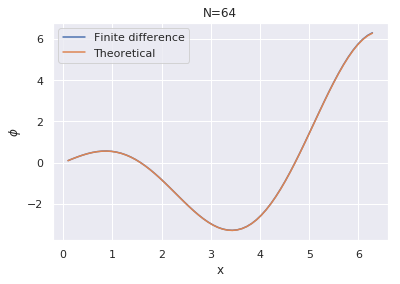

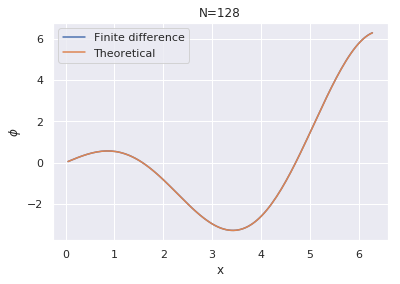

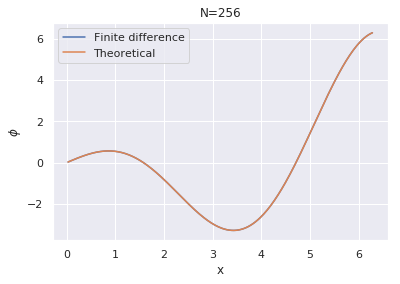

In [39]:
# constants
a = 0
b= 2*np.pi
rho = lambda x: 2*np.sin(x)+x*np.cos(x)
alfa = 0
gamma= 1
Ns = [8,16,32,64,128,256]
# theoretical answer
phiTeo = lambda x: x*np.cos(x)
# errors of the differenct cases (N x norm-type)
errors = np.zeros((6, 3))

for i, N in enumerate(Ns):
    h = (b-a)/N
    xlist = [a+i*h for i in range(1,N+1)]
    phi = mixedSolverSymmetric(a=a, b=b, alfa=alfa, gamma=gamma, N=N, rho=rho)
    phi2 = phi[0:-1]
    
    errors[i,0] = np.linalg.norm(phi2*h - np.array(phiTeo(xlist))*h, ord=1)
    errors[i,1] = np.linalg.norm(phi2*np.sqrt(h) - np.array(phiTeo(xlist))*np.sqrt(h), ord=2)
    errors[i,2] = np.linalg.norm(phi2 - phiTeo(xlist), ord=np.inf)
    
    # plotting stuff
    plt.figure()
    plt.title('N='+str(N))
    plt.xlabel('x')
    plt.ylabel('$\phi$')
    plt.plot(xlist, phi2)
    plt.plot(xlist, phiTeo(xlist))
    plt.legend(['Finite difference', 'Theoretical'])
    plt.grid(True)

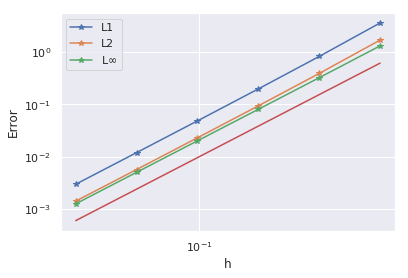

In [40]:
# deduce the h value from the N value to 3 decimal places
hs = [(b-a)/N for N in Ns]
plt.figure()
plt.loglog(hs, errors, '*-')
plt.loglog(hs, [h**2 for h in hs])
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['L1','L2','L$\infty$', 'h^2'])

(b) same thing only with the derivative approximated by the forward finite difference. This is worse because this scheme is $O(h)$ where the previous was $O(h^2)$

In [10]:
def mixedSolverForward(a, b, alfa, gamma, N, rho):
    h = (b-a)/N
    oldA = neumannSystemMatrix(N+1, a, b)
    # adding the new layer to the old matrix
    newA = np.zeros((N+1,N+1))
    newA[0:-1,0:-1] = oldA
    # the new equation comes at the bottom
    newA[-1,-1] = 1/h
    newA[-1,-2] = -1/h
    # the boundary point now has to be included in the calculation of the previous grid-point 
    newA[-2,-1] = -1/h**2
    # get the x-points in the interval 
    xlist = [a+i*h for i in range(1,N+1)]    
    rightSide = np.array([rho(x) for x in xlist])
    # The boundry conditions are added to the right hand side. What is missing on the upper equation is:- alfa/h**2,
    # so the opposite is added to the firs b-entry. The same for the last equation with beta.  
    rightSide[0] += alfa/h**2
    # now adding the boundary value explicitly
    rightSide = np.append(rightSide, [gamma])
    # now we can solve using the 
    x = np.linalg.solve(newA,rightSide)
    print('This is the smallest eigval')
    print(min(abs(np.linalg.eigvals(newA))))
    return x

This is the smallest eigval
0.041807286580144376
This is the smallest eigval
0.04416372518195485
This is the smallest eigval
0.04541172548470048
This is the smallest eigval
0.04605423676735208
This is the smallest eigval
0.046380261080657556
This is the smallest eigval
0.04654448351186793


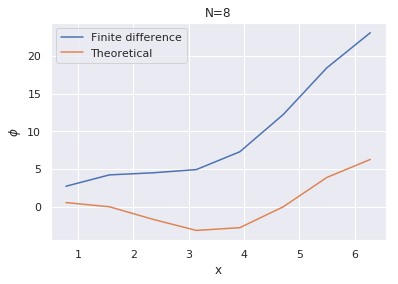

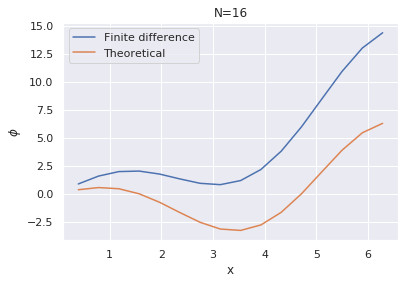

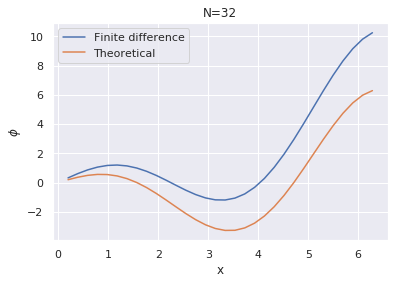

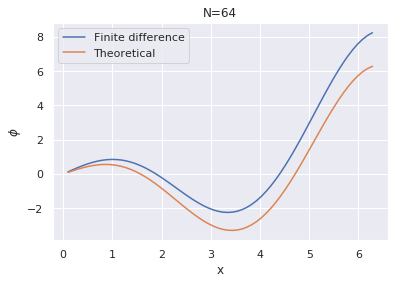

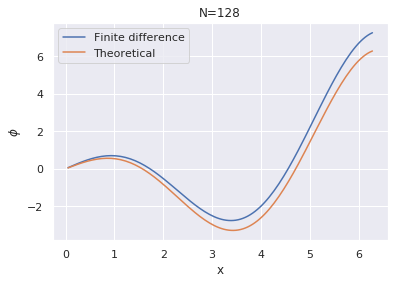

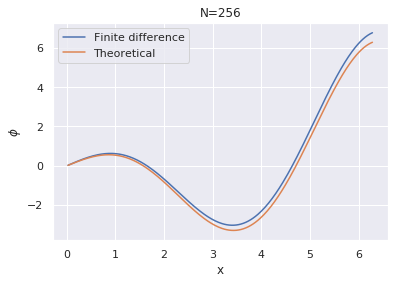

In [44]:
# constants
a = 0
b= 2*np.pi
rho = lambda x: 2*np.sin(x)+x*np.cos(x)
alfa = 0
gamma= 1
Ns = [8,16,32,64,128,256]
# theoretical answer
phiTeo = lambda x: x*np.cos(x)
# errors of the differenct cases (N x norm-type)
errors = np.zeros((6, 3))

for i, N in enumerate(Ns):
    h = (b-a)/N
    # now we need to append the last grid point
    xlist = [a+i*h for i in range(1,N+1)]
    phi = mixedSolverForward(a=a, b=b, alfa=alfa, gamma=gamma, N=N, rho=rho)
    
    phi = phi[0:-1]
    errors[i,0] = np.linalg.norm(phi - phiTeo(xlist), ord=1)
    errors[i,1] = np.linalg.norm(phi - phiTeo(xlist), ord=2)
    errors[i,2] = np.linalg.norm(phi - phiTeo(xlist), ord=np.inf)
    
    # plotting stuff
    plt.figure()
    plt.title('N='+str(N))
    plt.xlabel('x')
    plt.ylabel('$\phi$')
    plt.plot(xlist, phi)
    plt.plot(xlist, phiTeo(xlist))
    plt.legend(['Finite difference', 'Theoretical'])
    plt.grid(True)

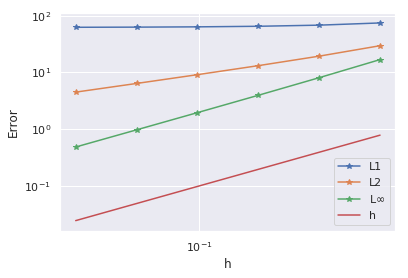

In [45]:
# deduce the h value from the N value 
hs = [(b-a)/N for N in Ns]
plt.figure()
plt.loglog(hs, errors, '*-')
plt.loglog(hs, hs, '-')
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['L1','L2','L$\infty$', 'h'])

3. periodic boundary conditions. We now have
$$\phi (x + L)=\phi (x)$$

The solution is now on all of R. 

(a) For solvability we need:

$$\phi ' (L)-\phi ' (0) = -\int^L_0 \rho (x) dx =0$$
Then the function is periodic

If we plug η into the Poisson equation it becomes the Laplace equation:

$$-\eta ''(x)=-(\phi ''(x) - \psi ''(x))=\rho(x)-\rho(x) = 0$$

we now integrate twice and get 
 $$\int\int -\eta ''(x)dxdx=-(\eta (x)+c_1 x + c_2 )=0$$,
we inset the two boundries because they have the same values
$$c_1 x + c_2 =c_1 (x+L) + c_2$$
we now have
$$c_1 x =c_1 (x+L) $$
This is of course true for infinetely many $c_1$'s so we need another condition. 

(b) Test with N=8. The extra unknown is now $\phi_0$. As one can see the matrix does not seem invertible, because it is a square matrix that has a zero eigval. 

In [13]:
N = 8
def periodicSystemMatrix(N, a, b):
    oldA = systemMatrix(N=N, a=a, b=b)
    A = np.zeros((N, N))
    A[1:N,1:N] = oldA
    # here comes the trick - $\phi_N$ i sno longer added to b but comes from $\phi_0$
    A[-1, 0] = -N**2
    # the same with $\phi_0$ it is also contained in the solution vector, so it doesnt get added to b
    A[1, 0] = -N**2
    # now the $\phi_0$ equation is treated as any other equation except its left grid point is $\phi_{N-1}$
    A[0, 0] = 2*N**2
    A[0, 1] = -1*N**2
    A[0, -1] = -1*N**2
    return A

A = periodicSystemMatrix(N=N, a=0, b=1)
print(A)

print('This is the smallest eigval')
print(min(abs(np.linalg.eigvals(A))))

[[128. -64.   0.   0.   0.   0.   0. -64.]
 [-64. 128. -64.   0.   0.   0.   0.   0.]
 [  0. -64. 128. -64.   0.   0.   0.   0.]
 [  0.   0. -64. 128. -64.   0.   0.   0.]
 [  0.   0.   0. -64. 128. -64.   0.   0.]
 [  0.   0.   0.   0. -64. 128. -64.   0.]
 [  0.   0.   0.   0.   0. -64. 128. -64.]
 [-64.   0.   0.   0.   0.   0. -64. 128.]]
This is the smallest eigval
7.105427357601002e-15


(c) Now we can again use the trick with including the value of $\phi_0$ to b, this way we can throw away the added layer and add stuff to the righthandside instead. Because we impose the value at the boarder to be 0, nothing is added to the righthandside. The resulting matrix is the same as the normal system matrix. As one can see that matrix has omly positive eigvals and is therefore invertible. 

In [14]:
def periodicSolver0Boundary(a, b, N, rho):
    h = (b-a)/N
    # the systme matrix is the old one
    A = systemMatrix(N=N, a=a, b=b)
    xlist = [a+i*h for i in range(1,N)]
    # the right hand side is just the rho at the grid points WITHOUT adding anything, because the
    # because the boundry points are 0 
    rightSide = np.array([rho(x) for x in xlist])
    x = np.linalg.solve(A,rightSide)
    return x

A = systemMatrix(N=8, a=0, b=1)
print(A)

print('This is the smallest eigval')
print(min(abs(np.linalg.eigvals(A))))

[[128. -64.   0.   0.   0.   0.   0.]
 [-64. 128. -64.   0.   0.   0.   0.]
 [  0. -64. 128. -64.   0.   0.   0.]
 [  0.   0. -64. 128. -64.   0.   0.]
 [  0.   0.   0. -64. 128. -64.   0.]
 [  0.   0.   0.   0. -64. 128. -64.]
 [  0.   0.   0.   0.   0. -64. 128.]]
This is the smallest eigval
9.743419838555344


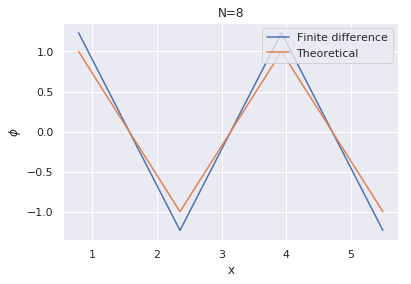

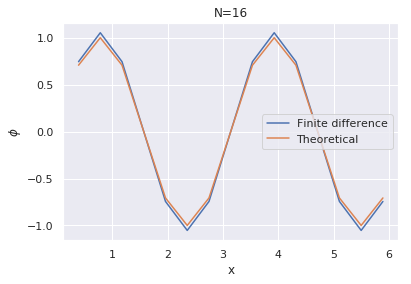

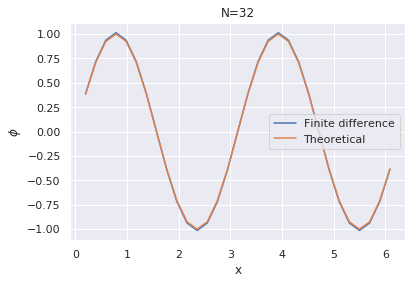

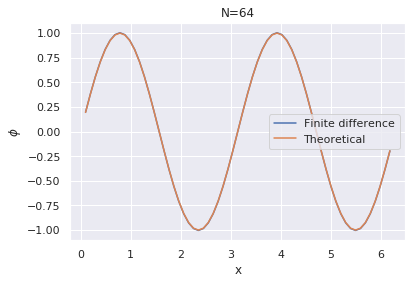

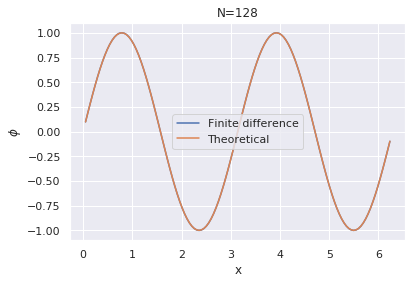

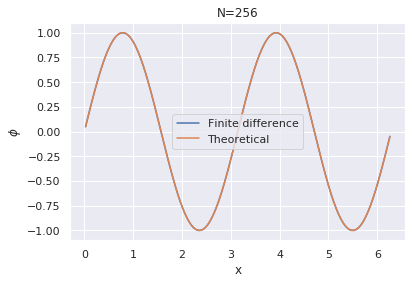

In [15]:
# constants
a = 0
b= 2*np.pi
rho = lambda x: 4*np.sin(2*x)
Ns = [8,16,32,64,128,256]
# theoretical answer
phiTeo = lambda x: np.sin(2*x)
# errors of the differenct cases (N x norm-type)
errors = np.zeros((6, 3))

for i, N in enumerate(Ns):
    h = (b-a)/N
    # now we need to append the last grid point
    xlist = [a+i*h for i in range(1,N)]
    phi = periodicSolver0Boundary(a=a, b=b, N=N, rho=rho)
    # the theoretical value of phi - done this way because of shape problems
    phiT = np.array([phiTeo(x) for x in xlist])
    
    errors[i,0] = np.linalg.norm(phi - phiT, ord=1)
    errors[i,1] = np.linalg.norm(phi - phiT, ord=2)
    errors[i,2] = np.linalg.norm(phi - phiT, ord=np.inf)
    
    # plotting stuff
    plt.figure()
    plt.title('N='+str(N))
    plt.xlabel('x')
    plt.ylabel('$\phi$')
    plt.plot(xlist, phi)
    plt.plot(xlist, phiT)
    plt.legend(['Finite difference', 'Theoretical'])
    plt.grid(True)

convergence stuff

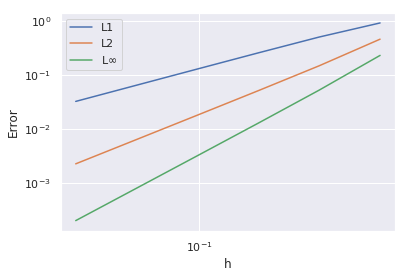

In [16]:
# deduce the h value from the N value 
hs = [(b-a)/N for N in Ns]
plt.figure()
plt.loglog(hs, errors)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['L1','L2','L$\infty$'])